In [1]:
#pip install --upgrade pip setuptools wheel
#!pip install matplotlib

In [2]:
# standard imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Manual style for plots
import sys
sys.path.append('../')
import style

In [4]:
print(style.sys_labels)
print(style.color_arr)
structure_types = ["None","Extended","Bridge","3-10","Alpha","Pi","Turn","Bend"]
#structure_types =['None', 'Parallel Beta-sheet', 'Anti-parallel Beta-sheet', '3-10 helix', 'Alpha helix','Pi (3-14) helix','Turn','Bend']

['(kG)₁₅+(eG)₁₅ ', '(kA)₁₅ +(eA)₁₅', '(kL)₁₅ +(eL)₁₅ ', '(kKg)₅ +(eEgEeG)₅', '(kKaKkA)₅ +(eEaEeA)₅', '(kKlKkL)₅+(eElEeL)₅']
['#FFE4E1', '#CD5C5C', '#CD2626', '#BFEFFF', '#00BFFF', '#104E8B']


In [6]:
sys=['pkG','pkA','pkL','pkkg','pkka','pkkl']
dfs=[]

#Load in data
for i in range(6):
    dfs.append( pd.read_csv("ss_data/"+sys[i]+"_ss_frac.txt",delim_whitespace=True,header=None,names=[sys[i]]))
df = pd.concat(dfs,axis=1)
df

,pkG,pkA,pkL,pkkg,pkka,pkkl
0,0.459419,0.301670,0.386573,0.543719,0.756449,0.774874
1,0.033267,0.007682,0.000134,0.012060,0.002303,0.002094
2,0.080962,0.019472,0.033066,0.083082,0.016122,0.015704
3,0.002305,0.002037,0.026052,0.000251,0.000000,0.000000
4,0.000267,0.000267,0.000134,0.000168,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.046259,0.232933,0.242385,0.062060,0.025628,0.021189
7,0.377522,0.435939,0.311657,0.298660,0.199497,0.186139


In [7]:
##CHECK IF DATA MAKES SENSE
print(df.sum())

pkG     1.0
pkA     1.0
pkL     1.0
pkkg    1.0
pkka    1.0
pkkl    1.0
dtype: float64


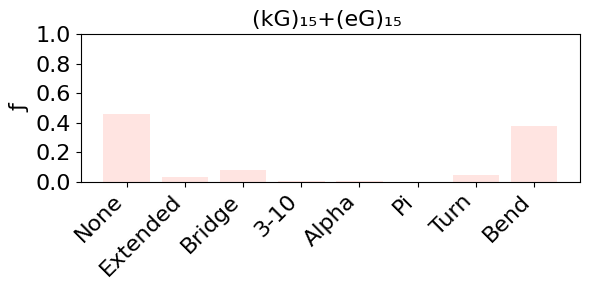

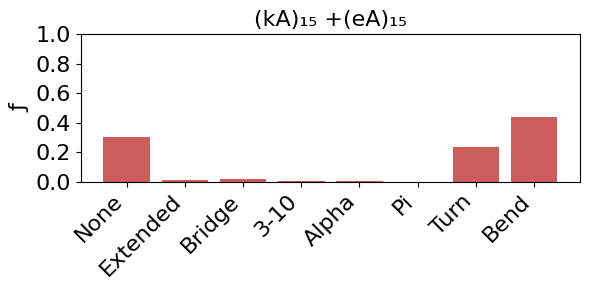

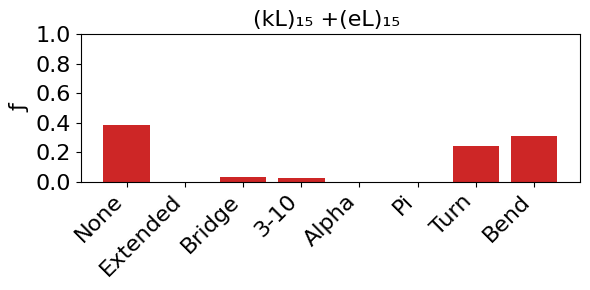

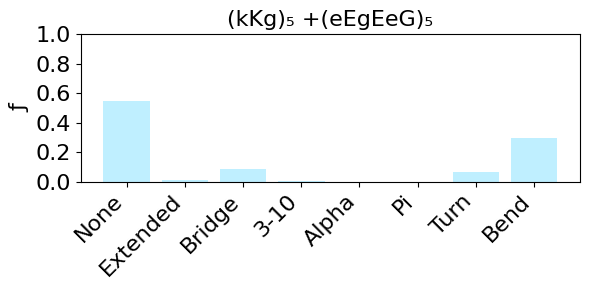

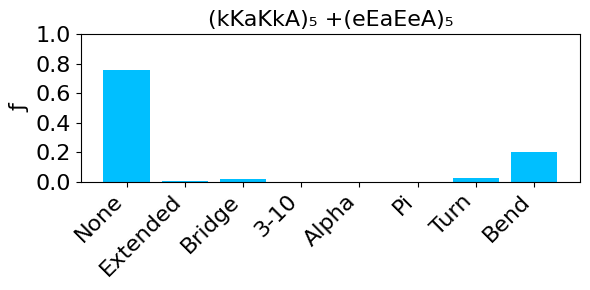

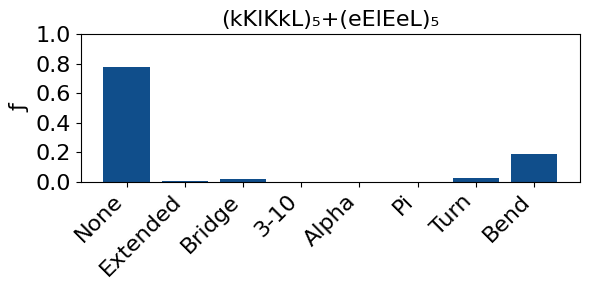

In [8]:
# Individual bar plots
x = range(8)
for i in range(6):
    plt.figure(figsize=(6,3))
    plt.bar(x,df.iloc[:,i], color=style.color_arr[i])
    
    plt.title(style.sys_labels[i],fontsize=style.font_size)
    plt.xticks(ticks=x,labels=structure_types,fontsize=style.font_size,rotation=45, ha='right')
    
    plt.ylim(0,1.0)
    plt.ylabel("ƒ",fontsize=style.font_size)
    plt.yticks(fontsize=style.font_size)
    
    plt.tight_layout()
   
    #plt.savefig("SS_S_series"+str(i)+".png",dpi=600)

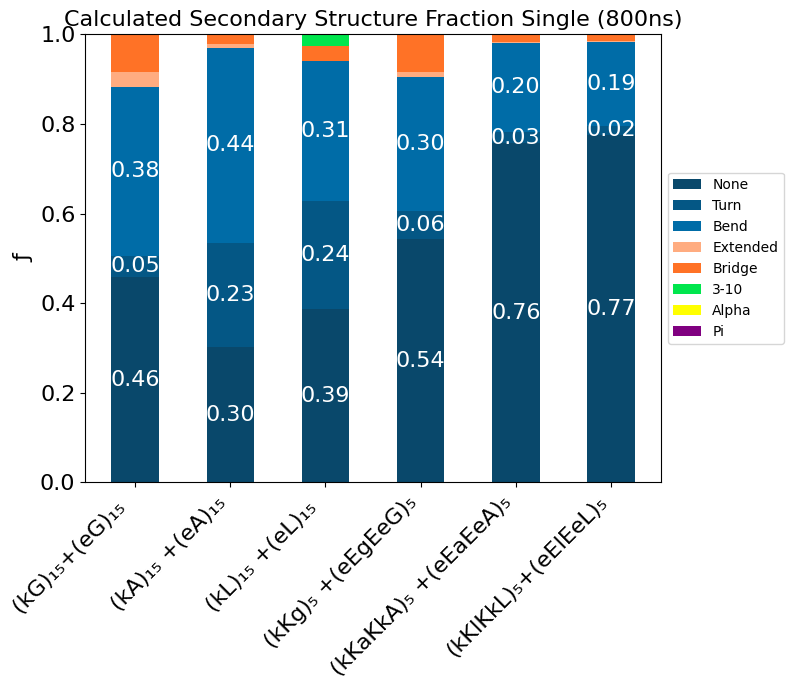

In [9]:
# Stacked Bar plots
fig, ax = plt.subplots(figsize=(8,7))

x = range(8)
bottom=np.zeros(6)
width = 0.50
order = [0,6,7,1,2,3,4,5]
p = []

c=0
for i in order:    
    p.append(ax.bar(style.sys_labels, df.iloc[i,:],width,label=structure_types[i],bottom=bottom,color=style.ss_colors[c]))
    bottom += df.iloc[i,:]
    c+=1
    
ax.bar_label(p[0],label_type='center', fmt='%.2f',color='white',fontsize=16)
ax.bar_label(p[1],label_type='center', fmt='%.2f',color='white',fontsize=16)
ax.bar_label(p[2],label_type='center', fmt='%.2f',color='white',fontsize=16)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45, ha='right',fontsize=style.font_size)
plt.yticks(fontsize=style.font_size)
ax.set_ylabel('ƒ',fontsize=style.font_size)
ax.set_title('Calculated Secondary Structure Fraction Single (800ns)',fontsize=style.font_size)

plt.tight_layout()
#plt.savefig("SS_single.png",dpi=600)